# 모듈 설치

In [4]:
import os
import sys
# import re
import pickle
from collections import defaultdict, OrderedDict, Counter
import warnings
warnings.filterwarnings('ignore')

# import json
from tqdm import tqdm

In [5]:
import numpy as np
import pandas as pd
# from pandas.plotting import scatter_matrix
# from pandas_profiling import ProfileReport
# from missingno import dendrogram
# import missingno as msno

# pd.options.display.float_format = '{:0.5f}'.format`

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(20, 10)})
plt.rc('font',family='Malgun Gothic')

----

# 데이터 베이스 활용

In [7]:
# 해당 데이터들의 정보와 DataFrame를 불러올 수 있는 딕셔너리
# 파일 크기 큼 주의
with open('Database.p', 'rb') as file:    
    DataBase = pickle.load(file)

In [8]:
# 해당 데이터들의 정보들만 빠르게 파악할 수 있는 딕셔너리
with open('Database_info.p', 'rb') as file:
    DataBase_info = pickle.load(file)

In [9]:
def db_NameList():
    """데이터베이스 안에 있는 data 이름들 리스트로 반환

    Returns:
        list: data Names in DataBase
    """
    return list(DataBase_info.keys())

In [10]:
def db_nameToInfo(name):
    """데이터베이스 중에 name 에 해당하는 정보들을 딕셔너리 형태로 반환

    Args:
        name (str): 데이터 이름 (한글)

    Returns:
        dict: name data's information
    """
    return DataBase_info[name]

In [57]:
def db_nameToDataframe(name):
    """데이터베이스 중에 name 에 해당하는 데이터 프레임 반환

    Args:
        name (str): 데이터 이름 (한글)

    Returns:
        DataFrame: name data's DataFrame
    """
    return DataBase[name]['data'].copy()

In [58]:
def db_nameToColumns(name):
    """데이터베이스 중에 name 에 해당하는 데이터 프레임의 칼럼 리스트 반환

    Args:
        name (str): 데이터 이름 (한글)

    Returns:
        list: name data's columns
    """
    return db_nameToInfo(name)['columns']

In [59]:
db_NameList()

['날씨별 배달 품목차이',
 '지역-업종 배달평균거리',
 '배달 상점 데이터',
 '업종 목적지별 배달 주문건수',
 '업종-거리구간 배달 건수',
 '업종 목적지별 평균주문금액',
 '주문지역 주거 특성',
 '주문지역 상권유형 특성',
 '주문지역 인구 특성',
 '주문지역 기상 정보',
 '지역-업종 결제정보',
 '지역-요일 배달 품목정보',
 '업종-거리구간 상권 정보',
 '시간-지역별 배달 주문건수',
 '시간-지역별 배달 평균주문금액',
 '시간-지역별 배달 소요시간평균',
 '업종-지역별 평균주문금액',
 '업종-지역별 배달 주문건수',
 '업종-지역별 평균배달소요시간']

In [60]:
db_nameToInfo('주문지역 주거 특성')

{'name': '주문지역 주거 특성',
 'code': 'KGURESIDEINFO',
 'len': 495000,
 'columns': ['기준연도',
  '시군구코드',
  '시도명',
  '시군구명',
  '세대구성대분류',
  '세대구성중분류',
  '세대구성소분류',
  '단위',
  '빈도수'],
 'shape': (495000, 9)}

### 0. 데이터 활용방안 모색

# 1. 주문지역 주거 특성 분석

In [61]:
data1=db_nameToDataframe('주문지역 주거 특성')

In [62]:
data1

,기준연도,시군구코드,시도명,시군구명,세대구성대분류,세대구성중분류,세대구성소분류,단위,빈도수
0,2015,11110,서울특별시,종로구,1세대 가구,부부,일반가구,가구,8162
1,2015,11110,서울특별시,종로구,1세대 가구,부부,주택_단독주택,가구,3409
2,2015,11110,서울특별시,종로구,1세대 가구,부부,주택_아파트,가구,1873
3,2015,11110,서울특별시,종로구,1세대 가구,부부,주택_연립주택,가구,784
4,2015,11110,서울특별시,종로구,1세대 가구,부부,주택_다세대주택,가구,1290
...,...,...,...,...,...,...,...,...,...
82495,2020,50130,제주특별자치도,서귀포시,비친족 가구,비친족 가구,가구원수 4명,가구,43
82496,2020,50130,제주특별자치도,서귀포시,비친족 가구,비친족 가구,가구원수 5명,가구,21
82497,2020,50130,제주특별자치도,서귀포시,비친족 가구,비친족 가구,가구원수 6명,가구,2.5
82498,2020,50130,제주특별자치도,서귀포시,비친족 가구,비친족 가구,가구원수 7명 이상,가구,2.5


In [63]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495000 entries, 0 to 82499
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   기준연도     495000 non-null  int64 
 1   시군구코드    495000 non-null  int64 
 2   시도명      495000 non-null  object
 3   시군구명     495000 non-null  object
 4   세대구성대분류  495000 non-null  object
 5   세대구성중분류  495000 non-null  object
 6   세대구성소분류  495000 non-null  object
 7   단위       495000 non-null  object
 8   빈도수      495000 non-null  object
dtypes: int64(2), object(7)
memory usage: 53.9+ MB


In [64]:
data1.shape

(495000, 9)

## 1) 전처리

In [98]:
data1.isnull().sum()

기준연도       0
시군구코드      0
시도명        0
시군구명       0
세대구성대분류    0
세대구성중분류    0
세대구성소분류    0
단위         0
빈도수        0
dtype: int64

### 1> '빈도수'항목 전처리

In [65]:
data1[(data1['빈도수']) == '다섯가구 미만']

,기준연도,시군구코드,시도명,시군구명,세대구성대분류,세대구성중분류,세대구성소분류,단위,빈도수


In [72]:
data1['빈도수']=np.where(data1['빈도수']=='다섯가구 미만', 2.5, data1['빈도수']) #디섯가구 미만을 2.5로

In [88]:
data1['빈도수'] = data1['빈도수'].astype(float)

In [77]:
data1.reset_index(inplace=True)

In [81]:
data1.drop('index', axis=1, inplace=True)

In [82]:
data1

,기준연도,시군구코드,시도명,시군구명,세대구성대분류,세대구성중분류,세대구성소분류,단위,빈도수
0,2015,11110,서울특별시,종로구,1세대 가구,부부,일반가구,가구,8162
1,2015,11110,서울특별시,종로구,1세대 가구,부부,주택_단독주택,가구,3409
2,2015,11110,서울특별시,종로구,1세대 가구,부부,주택_아파트,가구,1873
3,2015,11110,서울특별시,종로구,1세대 가구,부부,주택_연립주택,가구,784
4,2015,11110,서울특별시,종로구,1세대 가구,부부,주택_다세대주택,가구,1290
...,...,...,...,...,...,...,...,...,...
494995,2020,50130,제주특별자치도,서귀포시,비친족 가구,비친족 가구,가구원수 4명,가구,43
494996,2020,50130,제주특별자치도,서귀포시,비친족 가구,비친족 가구,가구원수 5명,가구,21
494997,2020,50130,제주특별자치도,서귀포시,비친족 가구,비친족 가구,가구원수 6명,가구,2.5
494998,2020,50130,제주특별자치도,서귀포시,비친족 가구,비친족 가구,가구원수 7명 이상,가구,2.5


## 2) 데이터 분석

### 1> 세대구성 대분류 별 빈도수파악

In [102]:
data1['세대구성대분류'].unique()

array(['1세대 가구', '2세대 가구', '3세대 가구', '4세대 이상 가구', '1인 가구', '비친족 가구'],
      dtype=object)

In [117]:
data1_1=data1.groupby('세대구성대분류')[['빈도수']].sum()

In [118]:
data1_1

,빈도수
세대구성대분류,
1세대 가구,64269733.2
1인 가구,104601587.5
2세대 가구,167308287.8
3세대 가구,16483192.1
4세대 이상 가구,187459.0
비친족 가구,5844640.1


In [123]:
data1_1.reset_index(inplace=True)

<AxesSubplot:xlabel='세대구성대분류', ylabel='빈도수'>

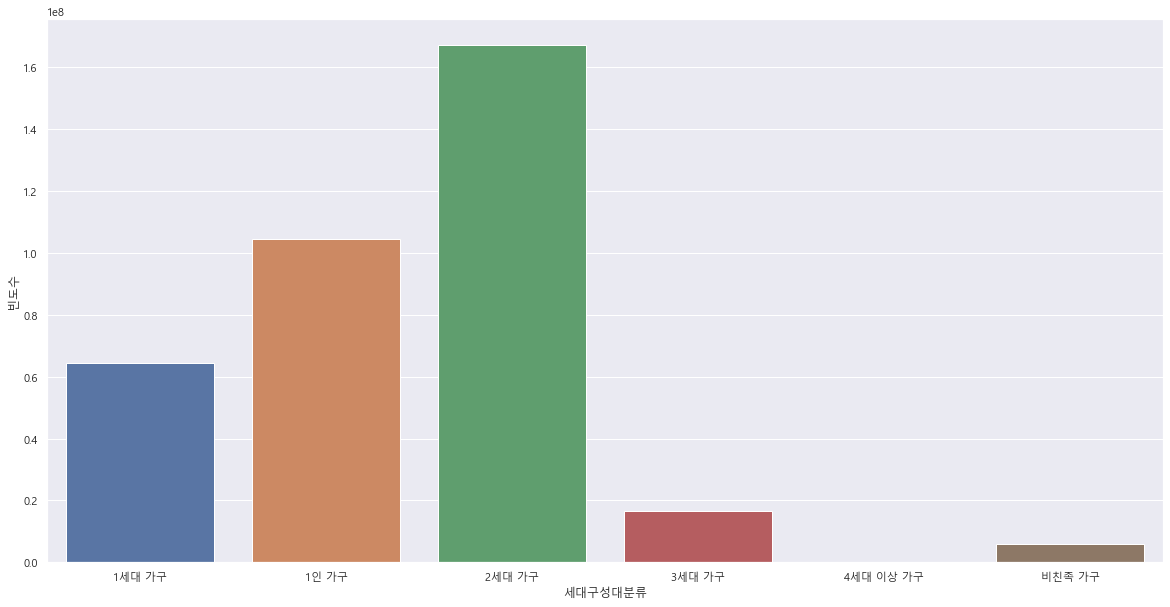

In [161]:
sns.barplot(data=data1_1, x='세대구성대분류', y='빈도수')

In [292]:
data1.groupby('시도명')['세대구성대분류'].value_counts()

시도명   세대구성대분류  
강원도   2세대 가구       14580
      1세대 가구        9720
      3세대 가구        6480
      1인 가구         1620
      4세대 이상 가구     1620
                   ...  
충청북도  1세대 가구        7560
      3세대 가구        5040
      1인 가구         1260
      4세대 이상 가구     1260
      비친족 가구        1260
Name: 세대구성대분류, Length: 102, dtype: int64

#### >>> insight : 시대구성분류에 주 분류된 가구가 2세대 가구라서 딱히 배달빈도와의 유의미한 관계 도출 힘듬. 지역별 세대가구 비율을 도출해 

### 2> 지역별 배달 빈도수파악

In [173]:
data1_2=data1.groupby('시도명')[['빈도수']].sum().reset_index() #지역별 빈도수 파악

<AxesSubplot:xlabel='시도명', ylabel='빈도수'>

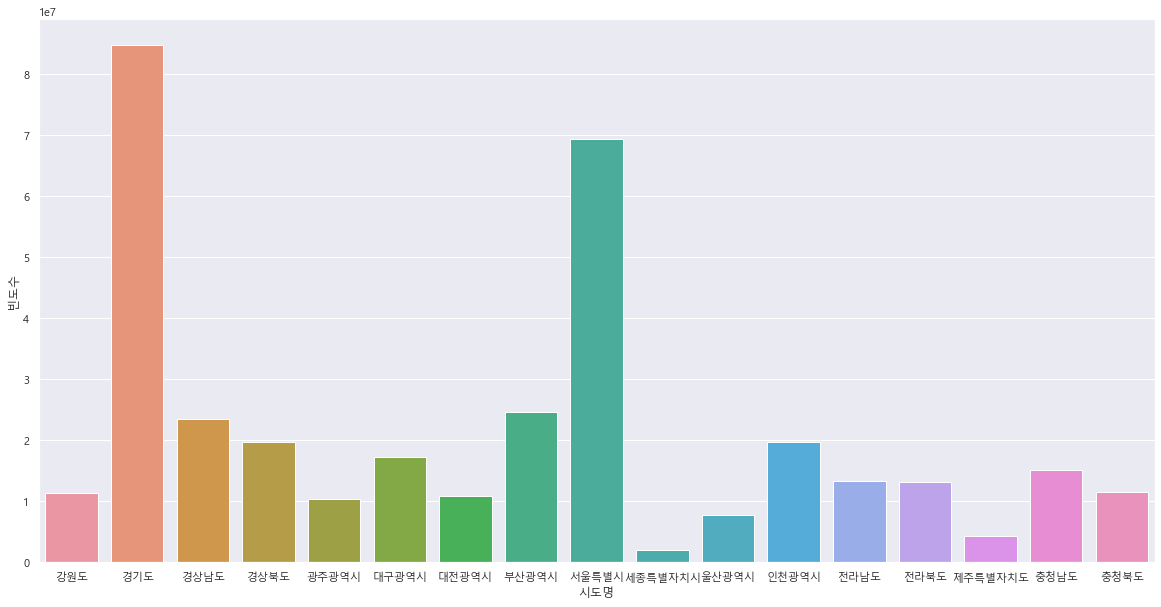

In [174]:
sns.barplot(data=data1_2, x='시도명', y='빈도수')

#### >>> insight : 단순 인구수에 비례한 누적 빈도수 값이라 지역별 인구비율과 비교해 빈도수 처리 필요!! (((지역별 인구수 비율 필요)))

### 3> 지역별 기준연도 기준 배달빈도수 파악

In [137]:
data1_3=data1.groupby(['시도명','기준연도'])[['빈도수']].sum()

In [138]:
data1_3.reset_index(inplace=True)

<AxesSubplot:xlabel='시도명', ylabel='빈도수'>

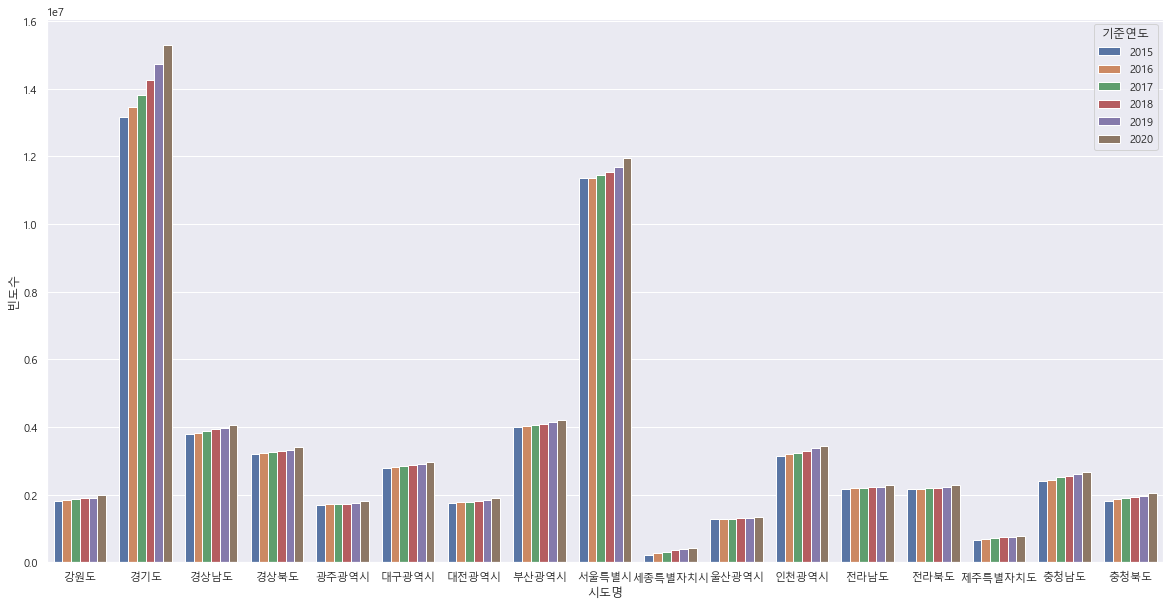

In [162]:
sns.barplot(data=data1_3, x='시도명', y='빈도수', hue ='기준연도')

In [ ]:
#### >>> insight : 2>의 insight와 마찬가지로 인구비율이 있어야 지표의 유의미한 insight 도출 가능

### 4> 연도별 배달빈도수 파악

In [128]:
data1_4=data1.groupby('기준연도')[['빈도수']].sum().reset_index()

<AxesSubplot:xlabel='기준연도', ylabel='빈도수'>

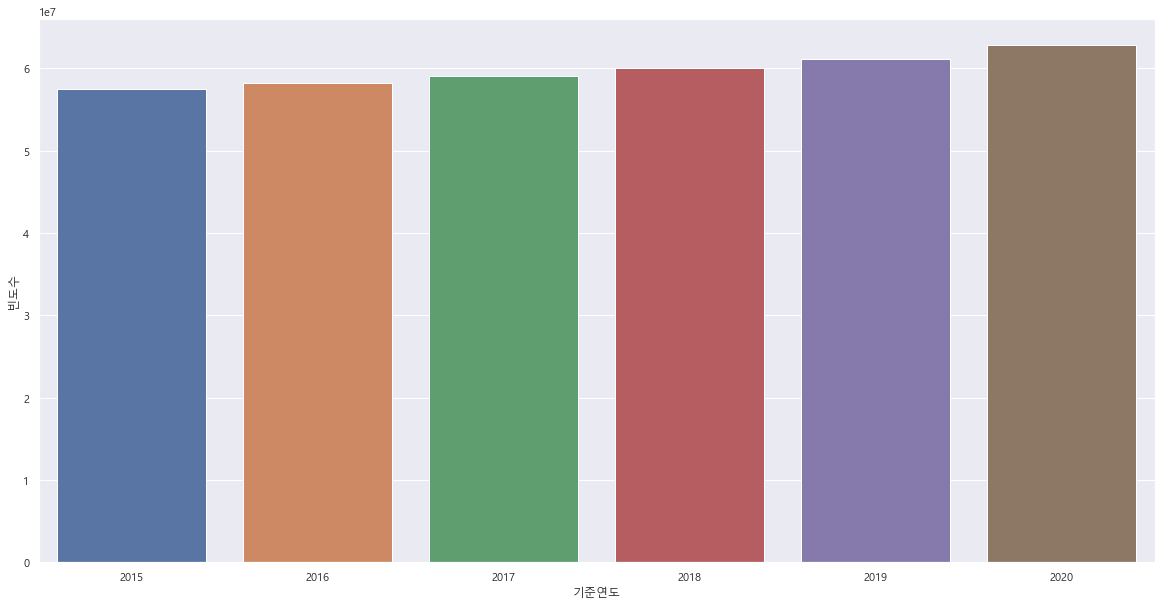

In [163]:
sns.barplot(data=data1_4, x='기준연도', y='빈도수')

In [ ]:
#### >>> insight : 매년 배달 빈도수 소폭 증가 확인! 최소 2020년까지는 배달산업이 단계적으로 성장했다고 할 수 있음

### 5> 세대구성 중분류 내의 빈도수파악

In [274]:
data1_5 = data1.groupby('세대구성중분류')[['빈도수']].sum()

In [275]:
data1_5.reset_index(inplace=True)

In [276]:
data1_5

,세대구성중분류,빈도수
0,1인 가구,104601587.5
1,4세대 이상 가구,187459.0
2,가구주+기타친인척,345687.8
3,가구주+미혼형제자매,3681247.8
4,기타,23793878.3
5,모+미혼자녀,27077553.7
6,부+미혼자녀,9344759.2
7,부부,57795482.0
8,부부+기타친인척,117856.6
9,부부+미혼자녀,110325441.9


<AxesSubplot:xlabel='세대구성중분류', ylabel='빈도수'>

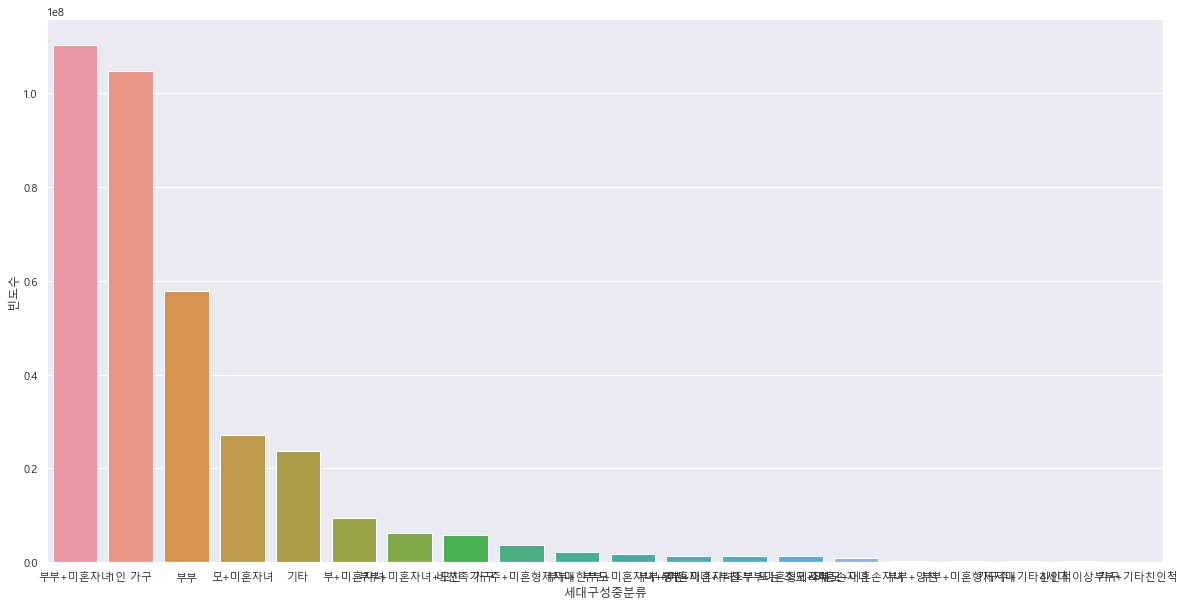

In [281]:
sns.barplot(data=data1_5, x='세대구성중분류', y='빈도수')

In [280]:
data1_5=data1_5.sort_values(by= '빈도수', ascending=False)

In [ ]:
#### >>> insight : 

### 6> 세대구성 소분류 내의 빈도수파악

In [165]:
data1_6 = data1.groupby('세대구성소분류')[['빈도수']].sum()

In [166]:
data1_6.reset_index(inplace=True)

<AxesSubplot:xlabel='세대구성소분류', ylabel='빈도수'>

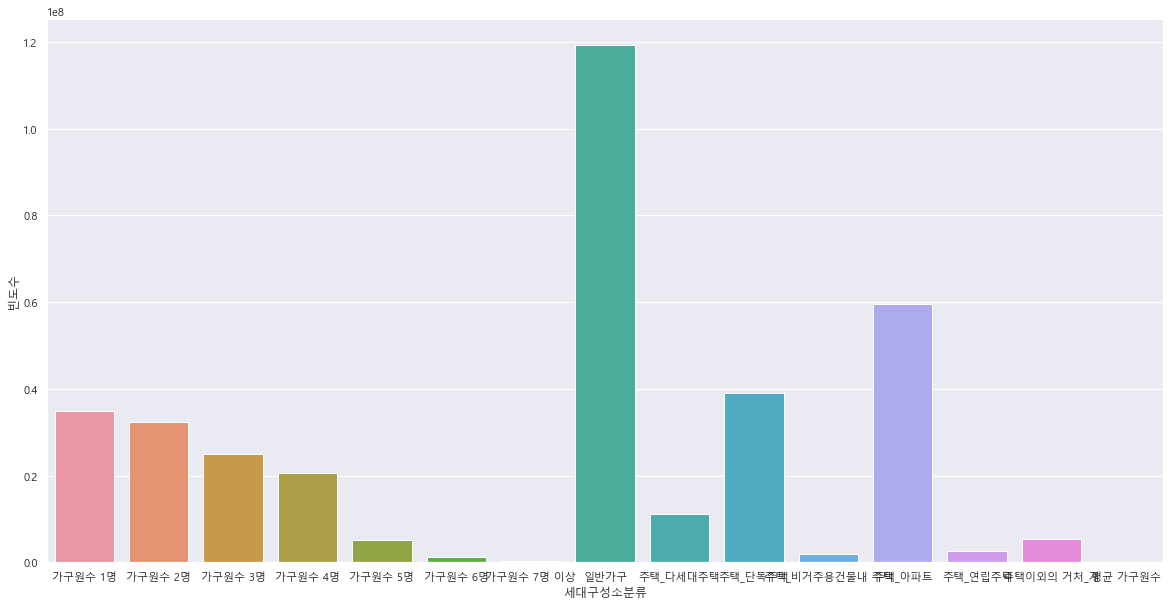

In [167]:
sns.barplot(data=data1_6, x='세대구성소분류', y='빈도수')

In [170]:
data1_6

,세대구성소분류,빈도수
0,가구원수 1명,34937946.0
1,가구원수 2명,32343586.0
2,가구원수 3명,25084233.0
3,가구원수 4명,20605107.0
4,가구원수 5명,5197859.0
5,가구원수 6명,1171655.5
6,가구원수 7명 이상,379533.0
7,일반가구,119401635.0
8,주택_다세대주택,11071308.0
9,주택_단독주택,39009579.5


In [250]:
data1_6_1 = data1_6.loc[:6]

In [251]:
def percent_(df_bin, df) :
    total = sum(df_bin)
    #print(total)
    percentage = df_bin/total*100
    #print(percentage)
    df['%']=percentage
    
    # 데이터프레임의 항목당 백분율 계산 함수 (매개변수 (DF_백분율로 나타내려는 column, DF))

In [252]:
data1_6_1

,세대구성소분류,빈도수
0,가구원수 1명,34937946.0
1,가구원수 2명,32343586.0
2,가구원수 3명,25084233.0
3,가구원수 4명,20605107.0
4,가구원수 5명,5197859.0
5,가구원수 6명,1171655.5
6,가구원수 7명 이상,379533.0


In [253]:
percent_(data1_6_1['빈도수'], data1_6_1)

In [254]:
data1_6_1

,세대구성소분류,빈도수,%
0,가구원수 1명,34937946.0,29.183068
1,가구원수 2명,32343586.0,27.016044
2,가구원수 3명,25084233.0,20.952431
3,가구원수 4명,20605107.0,17.211093
4,가구원수 5명,5197859.0,4.341683
5,가구원수 6명,1171655.5,0.978664
6,가구원수 7명 이상,379533.0,0.317017


#### 1>> 소분류 내의 가구원수 별 빈도수 파악

<AxesSubplot:xlabel='세대구성소분류', ylabel='%'>

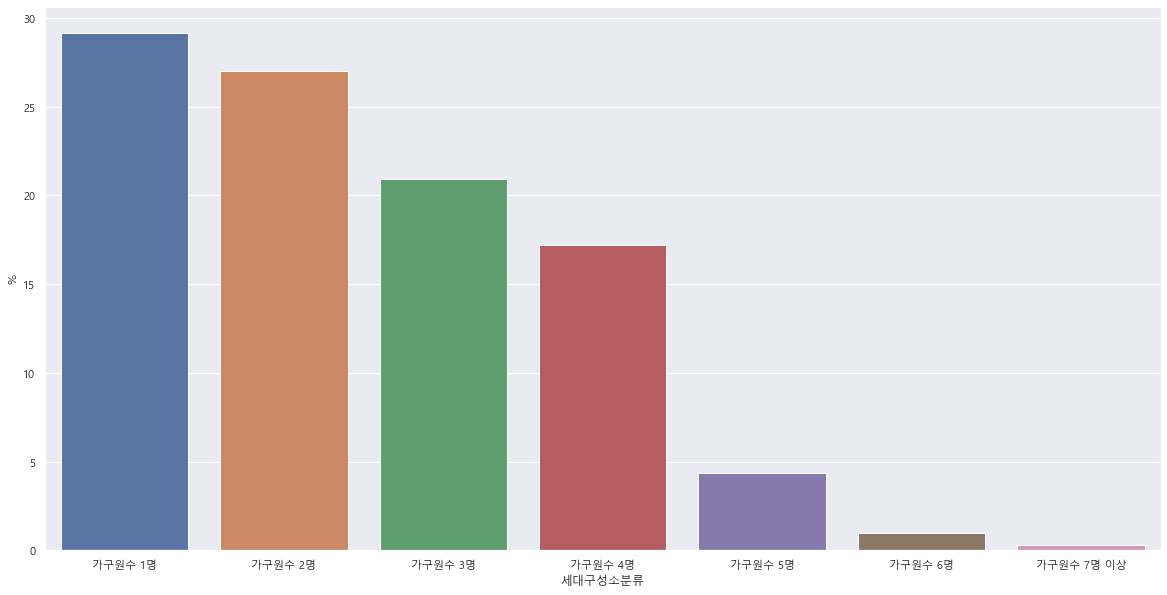

In [282]:
sns.barplot(data=data1_6_1, x='세대구성소분류', y='%')

#### >>> insight : 가구원수가 1.2.3.4인이 대다수의 배달주문 점유율을 차지함 but 인구수의 가구원수별 비율을 보고 그 빈도수가 더중요

In [262]:
data1_6[:7].sum()

세대구성소분류    가구원수 1명가구원수 2명가구원수 3명가구원수 4명가구원수 5명가구원수 6명가구원수...
빈도수                                              119719919.5
dtype: object

In [257]:
data1_6.loc[7]

세대구성소분류           일반가구
빈도수        119401635.0
Name: 7, dtype: object

In [258]:
data1_6[8:].sum()

세대구성소분류    주택_다세대주택주택_단독주택주택_비거주용건물내 주택주택_아파트주택_연립주택주택이외의...
빈도수                                              119573345.2
dtype: object

In [261]:
data1[data1['세대구성소분류']=='일반가구']

,기준연도,시군구코드,시도명,시군구명,세대구성대분류,세대구성중분류,세대구성소분류,단위,빈도수
0,2015,11110,서울특별시,종로구,1세대 가구,부부,일반가구,가구,8162.0
7,2015,11110,서울특별시,종로구,1세대 가구,부부+미혼형제자매,일반가구,가구,64.0
14,2015,11110,서울특별시,종로구,1세대 가구,부부+기타친인척,일반가구,가구,13.0
21,2015,11110,서울특별시,종로구,1세대 가구,가구주+미혼형제자매,일반가구,가구,1096.0
28,2015,11110,서울특별시,종로구,1세대 가구,가구주+기타친인척,일반가구,가구,78.0
...,...,...,...,...,...,...,...,...,...
450965,2020,50130,제주특별자치도,서귀포시,3세대 가구,부부+미혼자녀+모친,일반가구,가구,1226.0
450972,2020,50130,제주특별자치도,서귀포시,3세대 가구,기타,일반가구,가구,1842.0
450979,2020,50130,제주특별자치도,서귀포시,4세대 이상 가구,4세대 이상 가구,일반가구,가구,43.0
450986,2020,50130,제주특별자치도,서귀포시,1인 가구,1인 가구,일반가구,가구,22817.0


In [283]:
data1_6[8:]

,세대구성소분류,빈도수
8,주택_다세대주택,11071308.0
9,주택_단독주택,39009579.5
10,주택_비거주용건물내 주택,1939439.5
11,주택_아파트,59490811.0
12,주택_연립주택,2619121.0
13,주택이외의 거처_계,5334645.5
14,평균 가구원수,108440.7


In [284]:
data1_6_2=data1_6[8:]

In [285]:
percent_(data1_6_2['빈도수'], data1_6_2)

In [287]:
data1_6_2= data1_6_2.sort_values(by='%', ascending=False)

In [289]:
data1_6_2

,세대구성소분류,빈도수,%
11,주택_아파트,59490811.0,49.752569
9,주택_단독주택,39009579.5,32.623976
8,주택_다세대주택,11071308.0,9.259010
13,주택이외의 거처_계,5334645.5,4.461400
12,주택_연립주택,2619121.0,2.190389
10,주택_비거주용건물내 주택,1939439.5,1.621966
14,평균 가구원수,108440.7,0.090690


<AxesSubplot:xlabel='세대구성소분류', ylabel='%'>

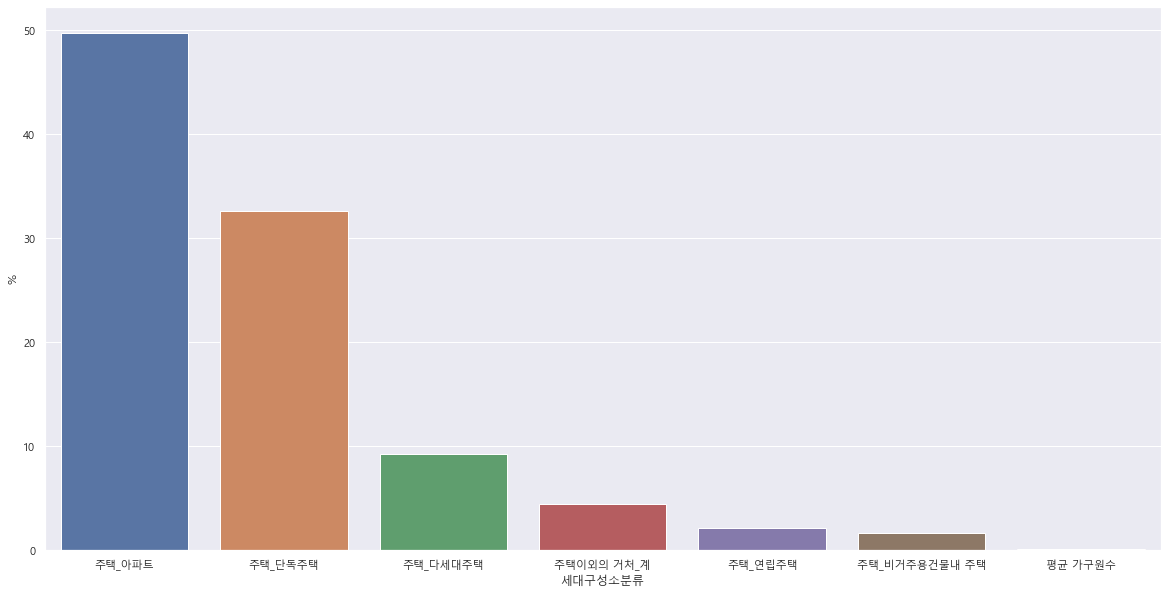

In [288]:
sns.barplot(data=data1_6_2, x='세대구성소분류', y='%')

#### >>> insight : 아파트와 단독주택에서 80% 이상의 배달율 차지 but 역시 비율별 비교가 더 정확